# Practice notebook for regression analysis with NHANES

This notebook will give you the opportunity to perform some
regression analyses with the NHANES data that are similar to
the analyses done in the week 2 case study notebook.

You can enter your code into the cells that say "enter your code here",
and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar
to code that appears in the case study notebook.  You will need
to edit code from that notebook in small ways to adapt it to the
prompts below.

To get started, we will use the same module imports and
read the data in the same way as we did in the case study:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np


In [2]:
url = "https://raw.githubusercontent.com/kshedden/statswpy/master/NHANES/merged/nhanes_2015_2016.csv"
df = pd.read_csv(url)

# Drop unused columns, drop rows with any missing values.
# add ALQ110 for qn 7
vars = ["BPXSY1", "RIDAGEYR", "RIAGENDR", "RIDRETH1", "DMDEDUC2", "BMXBMI", "SMQ020", "ALQ110"]
df = df[vars].dropna()


## Question 1:

Use linear regression to relate the expected body mass index (BMI) to a person's age.

In [3]:
# enter your code here
model = sm.OLS.from_formula("BMXBMI ~ RIDAGEYR", data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BMXBMI   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.280
Date:                Sun, 02 Jan 2022   Prob (F-statistic):              0.131
Time:                        02:41:05   Log-Likelihood:                -5033.1
No. Observations:                1473   AIC:                         1.007e+04
Df Residuals:                    1471   BIC:                         1.008e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.1093      0.596     48.871      0.000      27.941      30.278
RIDAGEYR       0.0161      0.011      1.510      0.131      -0.005       0.037
==============================================================================
Omnibus:                      263.915   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              495.303
Skew:                           1.083   Prob(JB):                    2.79e-108
Kurtosis:                       4.838   Cond. No.                         173.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Q1a.__ According to your fitted model, do older people tend to have higher or lower BMI than younger people?

__Q1b.__ Based your analysis, are you confident that there is a relationship between BMI and age in the population that NHANES represents?

__Q1c.__ By how much does the average BMI of a 40 year old differ from the average BMI of a 20 year old?

In [4]:
0.0091*(40-20)

0.182

__Q1d.__ What fraction of the variation of BMI in this population is explained by age?

## Question 2: 

Add gender and ethnicity as additional control variables to your linear model relating BMI to age.  You will need to recode the ethnic groups based
on the values in the codebook entry for [RIDRETH1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDRETH1).

In [5]:
df["RIDRETH1x"] = df.RIDRETH1.replace({1: 'Mexican American',
                                       2: 'Other Hispanic',
                                       3: 'Non-Hispanic White',
                                       4: 'Non-Hispanic Black',
                                       5: 'Other Race - Including Multi-Racial'})

In [6]:
# enter your code here
model_eth = sm.OLS.from_formula("BMXBMI ~ RIDAGEYR + RIDRETH1x", data = df)
results_eth = model_eth.fit()
results_eth.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BMXBMI   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     26.69
Date:                Sun, 02 Jan 2022   Prob (F-statistic):           6.85e-26
Time:                        02:41:05   Log-Likelihood:                -4970.1
No. Observations:                1473   AIC:                             9952.
Df Residuals:                    1467   BIC:                             9984.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           31.3410      0.674     46.512      0.000      30.019      32.663
RIDRETH1x[T.Non-Hispanic Black]                     -0.8604      0.569     -1.512      0.131      -1.977       0.256
RIDRETH1x[T.Non-Hispanic White]                     -1.1333      0.562     -2.018      0.044      -2.235      -0.032
RIDRETH1x[T.Other Hispanic]                         -1.0718      0.630     -1.702      0.089      -2.307       0.163
RIDRETH1x[T.Other Race - Including Multi-Racial]    -6.0268      0.587    -10.275      0.000      -7.177      -4.876
RIDAGEYR                                             0.0075      0.010      0.722      0.470      -0.013       0.028
==============================================================================
Omnibus:                      263.161   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              508.929
Skew:                           1.065   Prob(JB):                    3.07e-111
Kurtosis:                       4.937   Cond. No.                         306.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Q2a.__ How did the mean relationship between BMI and age change when you added additional covariates to the model?

__Q2b.__ How did the standard error for the regression parameter for age change when you added additional covariates to the model?

__Q2c.__ How much additional variation in BMI is explained by age~~, gender,~~ and ethnicity that is not explained by age alone?

__Q2d.__ What reference level did the software select for the ethnicity variable?

__Q2e.__ What is the expected difference between the BMI of a 40 year-old non-Hispanic black man and a 30 year-old non-Hispanic black man?

In [7]:
0.0059 * 10

0.059

__Q2f.__ What is the expected difference between the BMI of a 50 year-old Mexican American woman and a 50 year-old non-Hispanic black man?

In [8]:
# recode Females from 2 to 0
df["RIAGENDR"] = df.RIAGENDR.replace({2: 0})

In [9]:
model_eth = sm.OLS.from_formula("BMXBMI ~ RIDAGEYR + RIDRETH1x + RIAGENDR", data = df)
results_eth = model_eth.fit()
results_eth.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BMXBMI   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     23.80
Date:                Sun, 02 Jan 2022   Prob (F-statistic):           5.55e-27
Time:                        02:41:05   Log-Likelihood:                -4965.8
No. Observations:                1473   AIC:                             9946.
Df Residuals:                    1466   BIC:                             9983.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           31.6846      0.682     46.453      0.000      30.347      33.023
RIDRETH1x[T.Non-Hispanic Black]                     -0.7502      0.569     -1.319      0.187      -1.866       0.366
RIDRETH1x[T.Non-Hispanic White]                     -0.9866      0.562     -1.755      0.080      -2.090       0.116
RIDRETH1x[T.Other Hispanic]                         -1.0388      0.628     -1.654      0.098      -2.271       0.193
RIDRETH1x[T.Other Race - Including Multi-Racial]    -5.8381      0.588     -9.920      0.000      -6.992      -4.684
RIDAGEYR                                             0.0058      0.010      0.560      0.576      -0.015       0.026
RIAGENDR                                            -1.2017      0.407     -2.949      0.003      -2.001      -0.402
==============================================================================
Omnibus:                      256.385   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              491.828
Skew:                           1.044   Prob(JB):                    1.59e-107
Kurtosis:                       4.912   Cond. No.                         306.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# non-Hispanic black + RIAGENDR (male) coefficients
-0.4499 + (-1.0226)

-1.4725

## Question 3: 

Randomly sample 25% of the NHANES data, then fit the same model you used in question 2 to this data set.

In [11]:
# random.seed(5)
n = df.count()
# https://pandas.pydata.org/pandas-docs/version/0.25.0/reference/api/pandas.DataFrame.sample.html
# df_25 = df.sample(n = n/4, random_state = 5, axis = 0)
# https://www.geeksforgeeks.org/python-pandas-dataframe-sample/
df_25 = df.sample(frac = 0.25, random_state = 5)


In [12]:
model_eth2 = sm.OLS.from_formula("BMXBMI ~ RIDAGEYR + RIDRETH1x + RIAGENDR", data = df_25)
results_eth2 = model_eth2.fit()
results_eth2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BMXBMI   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     5.983
Date:                Sun, 02 Jan 2022   Prob (F-statistic):           5.60e-06
Time:                        02:41:05   Log-Likelihood:                -1238.3
No. Observations:                 368   AIC:                             2491.
Df Residuals:                     361   BIC:                             2518.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           33.1067      1.338     24.746      0.000      30.476      35.738
RIDRETH1x[T.Non-Hispanic Black]                     -1.5427      1.133     -1.361      0.174      -3.771       0.686
RIDRETH1x[T.Non-Hispanic White]                     -2.4338      1.198     -2.032      0.043      -4.790      -0.078
RIDRETH1x[T.Other Hispanic]                         -1.0340      1.265     -0.817      0.414      -3.522       1.454
RIDRETH1x[T.Other Race - Including Multi-Racial]    -5.6470      1.196     -4.721      0.000      -7.999      -3.295
RIDAGEYR                                            -0.0209      0.021     -1.004      0.316      -0.062       0.020
RIAGENDR                                            -1.6982      0.822     -2.065      0.040      -3.316      -0.081
==============================================================================
Omnibus:                       92.967   Durbin-Watson:                   1.817
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.936
Skew:                           1.252   Prob(JB):                     4.74e-48
Kurtosis:                       5.818   Cond. No.                         310.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Q3a.__ How do the estimated regression coefficients and their standard errors compare between these two models?  Do you see any systematic relationship between the two sets of results?

## Question 4:

Generate a scatterplot of the residuals against the fitted values for the model you fit in question 2.

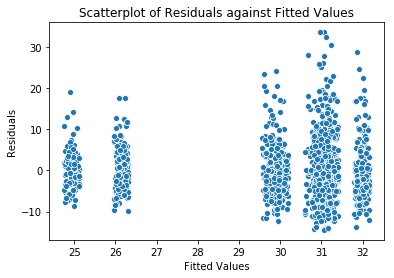

In [13]:
# https://seaborn.pydata.org/generated/seaborn.scatterplot.html
# https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLSResults.html
sns.scatterplot(x = results_eth.fittedvalues, y = results_eth.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Scatterplot of Residuals against Fitted Values")
plt.show()

__Q4a.__ What mean/variance relationship do you see?

## Question 5: 

Generate a plot showing the fitted mean BMI as a function of age for Mexican American men.  Include a 95% simultaneous confidence band on your graph.

/opt/conda/lib/python3.6/site-packages/statsmodels/sandbox/predict_functional.py:171: ValueWarning: 'ALQ110', 'RIDRETH1', 'SMQ020', 'DMDEDUC2', 'BPXSY1' in data frame but not in summaries or values.
  ValueWarning)


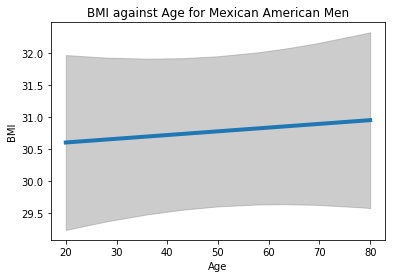

In [14]:
from statsmodels.sandbox.predict_functional import predict_functional
values = {"RIAGENDR" : 1,
          "RIDRETH1x" : 'Mexican American'}
# fv = functional values
predicted, confidenceband, fv = predict_functional(results_eth,
                                                   "RIDAGEYR",
                                                   values = values,
                                                   ci_method = 'simultaneous')
ax = sns.lineplot(x = fv, 
                  y = predicted, 
                  lw = 4)
ax.fill_between(x = fv, 
                y1 = confidenceband[:,0], 
                y2 = confidenceband[:,1],
                color = 'grey',
                alpha = 0.4)
plt.xlabel("Age")
plt.ylabel("BMI")
plt.title("BMI against Age for Mexican American Men")
plt.show()

__Q5a.__ According to your graph, what is the longest interval starting at year 30 following which the mean BMI could be constant?  *Hint:* What is the longest horizontal line starting at age 30 that remains within the confidence band?

/opt/conda/lib/python3.6/site-packages/statsmodels/sandbox/predict_functional.py:171: ValueWarning: 'ALQ110', 'RIDRETH1', 'SMQ020', 'DMDEDUC2', 'BPXSY1' in data frame but not in summaries or values.
  ValueWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/sandbox/predict_functional.py:171: ValueWarning: 'ALQ110', 'RIDRETH1', 'SMQ020', 'DMDEDUC2', 'BPXSY1' in data frame but not in summaries or values.
  ValueWarning)


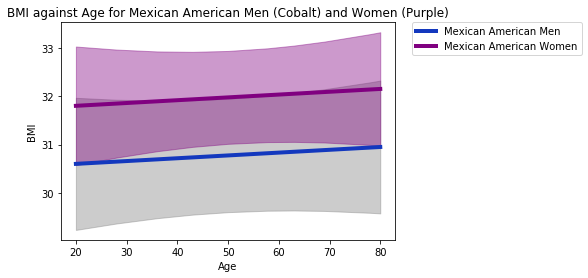

In [15]:
from statsmodels.sandbox.predict_functional import predict_functional
# Mexican American Men
values = {"RIAGENDR" : 1,
          "RIDRETH1x" : 'Mexican American'}
# fv = functional values
predicted, confidenceband, fv = predict_functional(results_eth,
                                                   "RIDAGEYR",
                                                   values = values,
                                                   ci_method = 'simultaneous')
ax = sns.lineplot(x = fv, 
                  y = predicted, 
                  lw = 4,
                  color = '#1338BE')
ax.fill_between(x = fv, 
                y1 = confidenceband[:,0], 
                y2 = confidenceband[:,1],
                color = 'grey',
                alpha = 0.4)


# Mexican American Women
valuesW = {"RIAGENDR" : 0,
          "RIDRETH1x" : 'Mexican American'}
predictedW, confidencebandW, fvW = predict_functional(results_eth,
                                                      "RIDAGEYR",
                                                      values = valuesW,
                                                      ci_method = 'simultaneous')
axW = sns.lineplot(x = fvW, 
                   y = predictedW, 
                   lw = 4,
                   color = 'purple')
axW.fill_between(x = fvW, 
                 y1 = confidencebandW[:,0], 
                 y2 = confidencebandW[:,1],
                 color = 'purple',
                 alpha = 0.4)


plt.xlabel("Age")
plt.ylabel("BMI")
plt.title("BMI against Age for Mexican American Men (Cobalt) and Women (Purple)")
# https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot
plt.legend(["Mexican American Men", "Mexican American Women"], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.show()

__Q5b.__ Add an additional line and confidence band to the same plot, showing the relationship between age and BMI for Mexican American women.  At what ages do these intervals not overlap?

## Question 6:

Use an added variable plot to assess the linearity of the relationship between BMI and age (when controlling for gender and ethnicity).

In [16]:
from statsmodels.graphics.regressionplots import add_lowess

# AttributeError: 'OLSResults' object has no attribute 'plot_added_variable'
# so we have to re-model using the GLM model
model_ethglm = sm.GLM.from_formula("BMXBMI ~ RIDAGEYR + RIDRETH1x + RIAGENDR", data = df)
results_ethglm = model_ethglm.fit()
results_ethglm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 BMXBMI   No. Observations:                 1473
Model:                            GLM   Df Residuals:                     1466
Model Family:                Gaussian   Df Model:                            6
Link Function:               identity   Scale:                          49.864
Method:                          IRLS   Log-Likelihood:                -4965.8
Date:                Sun, 02 Jan 2022   Deviance:                       73100.
Time:                        02:41:09   Pearson chi2:                 7.31e+04
No. Iterations:                     3   Covariance Type:             nonrobust
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           31.6846      0.682     46.453      0.000      30.348      33.021
RIDRETH1x[T.Non-Hispanic Black]                     -0.7502      0.569     -1.319      0.187      -1.865       0.365
RIDRETH1x[T.Non-Hispanic White]                     -0.9866      0.562     -1.755      0.079      -2.089       0.115
RIDRETH1x[T.Other Hispanic]                         -1.0388      0.628     -1.654      0.098      -2.270       0.192
RIDRETH1x[T.Other Race - Including Multi-Racial]    -5.8381      0.588     -9.920      0.000      -6.992      -4.685
RIDAGEYR                                             0.0058      0.010      0.560      0.576      -0.015       0.026
RIAGENDR                                            -1.2017      0.407     -2.949      0.003      -2.000      -0.403
====================================================================================================================
"""

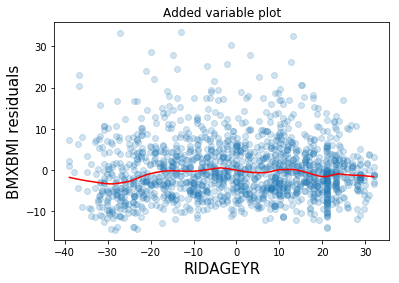

In [17]:
# fig = results_eth.plot_added_variable("Age")
fig = results_ethglm.plot_added_variable("RIDAGEYR")
ax = fig.get_axes()[0]
ax.lines[0].set_alpha(0.2)
_ = add_lowess(ax)


__Q6a.__ What is your interpretation of the added variable plot?

# Odds, Log Odds

## Question 7: 

Generate a binary variable reflecting whether a person has had at least 12 drinks in their lifetime, based on the [ALQ110](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/ALQ_I.htm#ALQ110) variable in NHANES.  Calculate the marginal probability, odds, and log odds of this variable for women and for men.  Then calculate the odds ratio for females relative to males.

In [18]:
# recode 2/No to '0'
df["ALQ110"] = df.ALQ110.replace({2: 0,
                                     7: np.nan,
                                     9: np.nan})

In [19]:
# recode GENDER
df["RIAGENDRx"] = df.RIAGENDR.replace({0: 'Female',
                                       1: 'Male'})

In [20]:
df = df.dropna()

In [21]:
pd.crosstab(df.RIAGENDRx, df.ALQ110)

ALQ110,0.0,1.0
RIAGENDRx,,
Female,569,467
Male,232,200


In [22]:
# Marginal probability = P(someone drank at least 12 drinks in their lifetime) = P(ALQ110 = 1) = p
drinks = pd.crosstab(df.RIAGENDRx, df.ALQ110).apply(lambda x: x/x.sum(), axis = 1)

# Odds = p/(1-p)
# drinks["odds"] = drinks["1.0"]/drinks["0.0"]
drinks["odds"] = drinks.loc[:,1]/drinks.loc[:,0]

# log odds = log(p/(1-p))
# TypeError: cannot do label indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [2] of <class 'int'>
# drinks["logodds"] = np.log(drinks.loc[:,2])
drinks["logodds"] = np.log(drinks.loc[:,"odds"])

drinks

ALQ110,0.0,1.0,odds,logodds
RIAGENDRx,,,,
Female,0.549228,0.450772,0.820738,-0.197551
Male,0.537037,0.462963,0.862069,-0.148420


In [23]:
# testing
drinks.loc[:,0]

TypeError: cannot do label indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [0] of <class 'int'>

__Q7a.__ Based on the log odds alone, do more than 50% of women drink alcohol?

__Q7b.__ Does there appear to be an important difference between the alcohol use rate of women and men?

In [24]:
# women logodds minus men logodds
-0.197551 - (-0.148420)

-0.04913100000000001

# Logistic Regression

## Question 8: 

Use logistic regression to express the log odds that a person drinks (based on the binary drinking variable that you constructed above) in terms of gender.

In [25]:
model_drinks = sm.GLM.from_formula("ALQ110 ~ RIAGENDR", family=sm.families.Binomial(), data = df)
results_drinks = model_drinks.fit()
results_drinks.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 ALQ110   No. Observations:                 1468
Model:                            GLM   Df Residuals:                     1466
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1011.3
Date:                Sun, 02 Jan 2022   Deviance:                       2022.6
Time:                        02:41:30   Pearson chi2:                 1.47e+03
No. Iterations:                     4   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1976      0.062     -3.164      0.002      -0.320      -0.075
RIAGENDR       0.0491      0.115      0.427      0.669      -0.176       0.274
==============================================================================
"""

__Q8a.__ Is there statistical evidence that the drinking rate differs between women and men?  If so, in what direction is there a difference?

__Q8b.__ Confirm that the log odds ratio between drinking ~~and smoking~~ calculated using the logistic regression model matches the log odds ratio calculated directly in question 7.

In [26]:
drinks["logodds"].Male - drinks["logodds"].Female

0.0491311713391602

## Question 9: 

Use logistic regression to relate drinking to age, gender, and education.

In [27]:
df["DMDEDUC2x"] = df.DMDEDUC2.replace({1: "less_than_9",
                                       2: "9_11",
                                       3: "HS",
                                       4: "AA",
                                       5: "College",
                                       9: np.nan})

In [28]:
df.DMDEDUC2x.dropna()

3           College
4                AA
5              9_11
13          College
19               AA
21               HS
22      less_than_9
24             9_11
27          College
29      less_than_9
30               AA
32      less_than_9
33             9_11
38               HS
46               AA
52      less_than_9
55             9_11
61               HS
63          College
73      less_than_9
76          College
80             9_11
82               AA
84             9_11
101     less_than_9
105     less_than_9
106     less_than_9
109              HS
111              AA
113              HS
           ...     
5635        College
5638           9_11
5641        College
5642             HS
5645           9_11
5647             AA
5648             AA
5652             HS
5657    less_than_9
5666        College
5669             AA
5672             AA
5681        College
5683             AA
5684             HS
5685        College
5688             AA
5693             HS
5694             HS


In [29]:
df.columns

Index(['BPXSY1', 'RIDAGEYR', 'RIAGENDR', 'RIDRETH1', 'DMDEDUC2', 'BMXBMI',
       'SMQ020', 'ALQ110', 'RIDRETH1x', 'RIAGENDRx', 'DMDEDUC2x'],
      dtype='object')

In [30]:
model_drinks = sm.GLM.from_formula("ALQ110 ~ RIAGENDR + RIDAGEYR + DMDEDUC2x", family=sm.families.Binomial(), data = df)
results_drinks = model_drinks.fit()
results_drinks.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 ALQ110   No. Observations:                 1467
Model:                            GLM   Df Residuals:                     1460
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -987.65
Date:                Sun, 02 Jan 2022   Deviance:                       1975.3
Time:                        02:41:48   Pearson chi2:                 1.47e+03
No. Iterations:                     4   Covariance Type:             nonrobust
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.9345      0.226     -4.129      0.000      -1.378      -0.491
DMDEDUC2x[T.AA]              0.5643      0.182      3.100      0.002       0.207       0.921
DMDEDUC2x[T.College]         0.4496      0.190      2.367      0.018       0.077       0.822
DMDEDUC2x[T.HS]              0.4218      0.191      2.203      0.028       0.047       0.797
DMDEDUC2x[T.less_than_9]    -0.3983      0.201     -1.984      0.047      -0.792      -0.005
RIAGENDR                     0.0313      0.117      0.267      0.789      -0.198       0.261
RIDAGEYR                     0.0090      0.003      2.975      0.003       0.003       0.015
============================================================================================
"""

__Q9a.__ Which of these predictor variables shows a statistically significant association with drinking?

__Q9b.__ What is the odds of a college educated, 50 year old woman drinking?

In [33]:
# Predictor variables: DMDEDUC2x[T.College]
# logodds = 0.4496
odds = np.exp(0.4496)
odds

1.5676849860642206

__Q9c.__ What is the odds ratio between the drinking status for college graduates and high school graduates (with no college), holding gender and age fixed?

In [34]:
# College - HS
0.4496 - 0.4218

0.02779999999999999

__Q9d.__ Did the regression parameter for gender change to a meaningful degree when age and education were added to the model?

## Question 10:

Construct a CERES plot for the relationship between drinking and age (using the model that controls for gender and educational attainment).

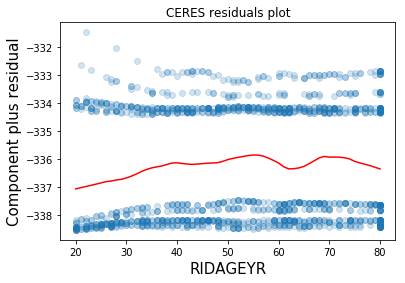

In [35]:
fig = results_drinks.plot_ceres_residuals("RIDAGEYR")
ax = fig.get_axes()[0]
ax.lines[0].set_alpha(0.2)
_ = add_lowess(ax)

__Q10a.__ Does the plot indicate any major non-linearity in the relationship between age and the log odds for drinking?